Analýza štruktúry dát:
súbory:
    session.csv - súbor obsahuje informácie ohľadom užívateľských sedení v e-shope. obsahuje aj driver atribút "ack", ktorý hovorí o zakúpení počas sedenia.
                - odkazuje na používateľa pomocou user_id a pomocou product_ean s produktami (aj keď medzi session.csv a product.csv nie je žiaden prienik)
                - počet záznamov: 11040, počet atribútov: 25
    user.csv    - obsahuje vitálne osobné informácie o používateľovi: jeho lokáciu, pohlavie, email, dátum registrácie a adresu.
                - počet záznamov: 2593, počet atribútov: 11
    product.csv - obsahuje infromácie o lokalite produktu: názov obchodu, lokáciu obchodu (krajina a mesto) a EAN produktu
                - počet záznamov: 14909, počet atribútov: 4
Analýza vybraných atribútov atribútov:
    session.csv - user_id -> identifikátor používateľa, spája sedenie s tabuľkou s informáciami o používateľovi
                - product_ean -> identifikátor produktu, spája sedenie s tabuľkou s informáciami o produkte
                - ack -> predikovaná premenná, ktorá určuje, či bol počas sedenia zakúpený produkt
                -
    user.csv    - user_id -> dentifikátor používateľa, spája sedenie s tabuľkou s informáciami o používateľovi
                - birthdate -> uvedený dátum narodenia používateľa
                - registration -> dátum registrácie používateľa
                - current_location -> momentálna poloha používateľa
                - username -> zvolené používateľské meno (alias) používateľa
    product.csv - code -> kód krajiny, kde sa produkt nachádza
                - product_ean -> identifikátor produktu
                - store_name -> názov obcohdu, ktorý daný produkt ponúka
                - location -> lokácia produktu/obchodu

In [2]:
import pandas as pd, numpy, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns, sklearn.preprocessing as prep

nacitanie dat do dafatfamov

In [3]:
df_product = pd.read_csv("product.csv", sep='\t')
df_session = pd.read_csv("session.csv", sep='\t')
df_users = pd.read_csv("user.csv", sep='\t')
print(len(df_product), len(df_session), len(df_users))
# df_product.head()
# df_session.head()
# df_users.head()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_session)

14908 11039 2592


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



pocet zaznamov v kazdom subore

In [4]:
print(f'pocet pozretych produktov: {len(df_product)}\npocet uzivatelskych sedeni: {len(df_session)}\npocet pouzivatelov: {len(df_users)}')

pocet pozretych produktov: 14908
pocet uzivatelskych sedeni: 11039
pocet pouzivatelov: 2592


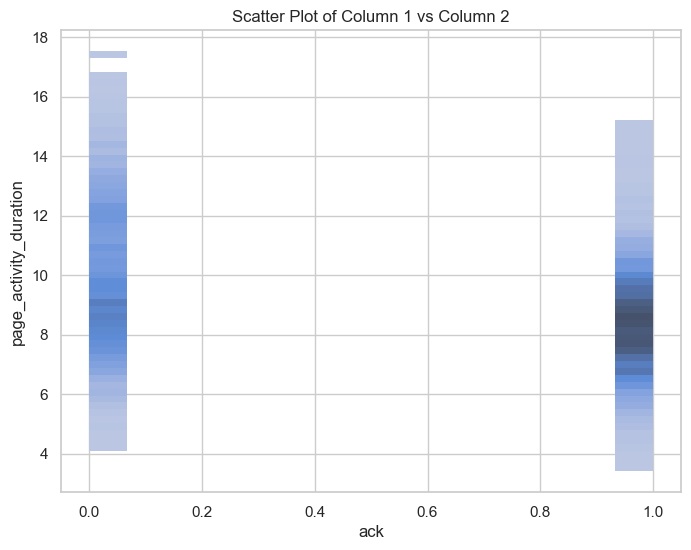

In [5]:
df_product.describe()
df_session
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(x='ack', y="page_activity_duration", data=df_session)
plt.xlabel('ack')
plt.ylabel('page_activity_duration')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.show()

In [6]:
df_ses_user = df_session.set_index("user_id").join(df_users.set_index("user_id"), on="user_id", how="inner")
df_ses_user

,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,race,username,sex,residence,name,address,mail,current_location,registration,birthdate
user_id,,,,,,,,,,,,,,,,,,,,,
933,465974,108.38966,11.99156,10.16503,51.33054,chrome,55.75590,9.39695,1.86608,1920,...,NaN,ysasaki,NaN,NaN,福田 太郎,NaN,tanakakenichi@gmail.com,"(Decimal('-33.852852'), Decimal('-118.678357'))",19 Jul 2017,1966-07-23
933,465974,108.38966,11.99156,10.16503,51.33054,chrome,55.75590,9.39695,1.86608,1920,...,NaN,vjandova,NaN,Štychova 397\n233 13 Sobotka,Lukáš Šimek,Michnova 2\n537 89 Kunovice,kralovalucie@centrum.cz,"(Decimal('18.418513'), Decimal('68.290271'))",06 Feb 2023,1952-12-27
933,465974,108.38966,11.99156,10.16503,51.33054,chrome,55.75590,9.39695,1.86608,1920,...,NaN,rmelo,NaN,NaN,Pedro Miguel Teixeira,"Vereda Jesus, 75\nMarilandia\n84031-980 Moura ...",bnovaes@yahoo.com.br,"(Decimal('79.175858'), Decimal('-55.852727'))",06 Jan 2014,1958-12-13
933,1105710,166.21561,10.52415,4.38422,42.96373,mobile,40.59324,8.36092,0.49698,lower,...,NaN,ysasaki,NaN,NaN,福田 太郎,NaN,tanakakenichi@gmail.com,"(Decimal('-33.852852'), Decimal('-118.678357'))",19 Jul 2017,1966-07-23
933,1105710,166.21561,10.52415,4.38422,42.96373,mobile,40.59324,8.36092,0.49698,lower,...,NaN,vjandova,NaN,Štychova 397\n233 13 Sobotka,Lukáš Šimek,Michnova 2\n537 89 Kunovice,kralovalucie@centrum.cz,"(Decimal('18.418513'), Decimal('68.290271'))",06 Feb 2023,1952-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,132485,148.55026,11.80061,6.56622,72.68453,firefox,33.09451,10.43734,13.83667,higher,...,unspecified,aureliadietz,NaN,NaN,Käthi Hiller,Mariola-Schaaf-Straße 959\n65507 Forchheim,walburga00@yahoo.de,"(Decimal('-47.7416625'), Decimal('-55.334084'))",2017/08/17,NaN
339,132485,148.55026,11.80061,6.56622,72.68453,firefox,33.09451,10.43734,13.83667,higher,...,NaN,maisato,M,NaN,斎藤 亮介,広島県横浜市中区鶴ヶ丘37丁目26番1号 コート四区町651,endohideki@gmail.com,"(Decimal('-28.325217'), Decimal('135.803548'))",2023-07-23,2002-07-31
2194,438768,218.63733,6.59800,4.79447,45.41353,mobile,30.77513,9.28343,17.37617,1366,...,NaN,unovaro,F,"Viale Guarino, 9 Appartamento 80\n28074, Ghemm...",Allegra Chindamo-Modigliani,"Stretto Turchi, 75\n07023, Calangianus (SS)",maurizio58@gmail.com,"(Decimal('43.487102'), Decimal('-109.872997'))",20 Dec 2022,1952-06-14


In [7]:
df_temp = df_session.where(df_session["user_id"] == 933)
df_temp.dropna()
df_session

,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,ack,pct_wild_mouse,pct_doubleclick,pct_input,mouse_move_total_rel_distance,page_activity_duration,user_id,pct_click,session_start,screen_height
0,29352,46.20666,8.66407,8.38688,39.96280,chrome,50.61083,10.41166,3.60459,1920,...,0.0,54.43209,12.49105,4.47198,13.77493,13.45456,1210,7.31828,2023-07-24 21:57:03,600
1,769698,205.16791,12.02141,12.17055,60.01076,edge,42.49860,10.15309,7.06828,1366,...,0.0,51.23958,7.87225,3.51481,8.68947,7.07715,1050,8.37471,2019-09-14 02:15:38,1080
2,284853,234.67891,12.16289,9.58028,54.80463,chrome,48.92000,8.80681,6.13853,1920,...,1.0,39.34868,8.47885,0.93258,7.47787,3.55613,1026,10.49107,2022-02-18 18:49:38,1080
3,1427567,144.28902,12.06736,7.21877,45.49934,edge,49.84135,8.68074,1.86351,1920,...,0.0,35.79768,13.23949,0.76370,10.49697,9.16388,956,11.41349,2023-04-30 17:18:55,600
4,465974,108.38966,11.99156,10.16503,51.33054,chrome,55.75590,9.39695,1.86608,1920,...,0.0,44.74054,11.58722,1.67888,8.31823,9.48939,933,10.83115,2022-01-05 10:29:17,lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11034,932425,159.66864,11.95720,12.40163,29.80343,opera,54.58413,10.33889,7.31696,1366,...,1.0,48.63297,7.37053,4.11710,8.60510,8.28009,896,8.01530,2020-10-05 09:05:46,higher
11035,978422,39.83148,5.34172,2.62107,58.35084,other,69.14506,10.38615,4.44113,1024,...,1.0,57.74391,14.22492,4.38136,11.83268,6.09414,247,11.50074,2020-05-12 19:46:24,800
11036,420213,88.51734,7.37956,4.40572,36.13766,chrome,24.40196,10.20908,3.90621,1920,...,1.0,56.14606,11.37564,3.67240,13.57094,11.65986,2371,14.30920,2018-10-05 10:53:30,1024
11037,207629,183.29016,10.75805,10.47122,64.75961,other,45.14381,11.17955,5.33379,1366,...,0.0,55.69028,13.96798,9.60474,14.08702,14.31638,825,7.92208,2020-05-29 18:15:28,higher


Text(0.5, 1.0, 'Scatter Plot of Column 1 vs Column 2')

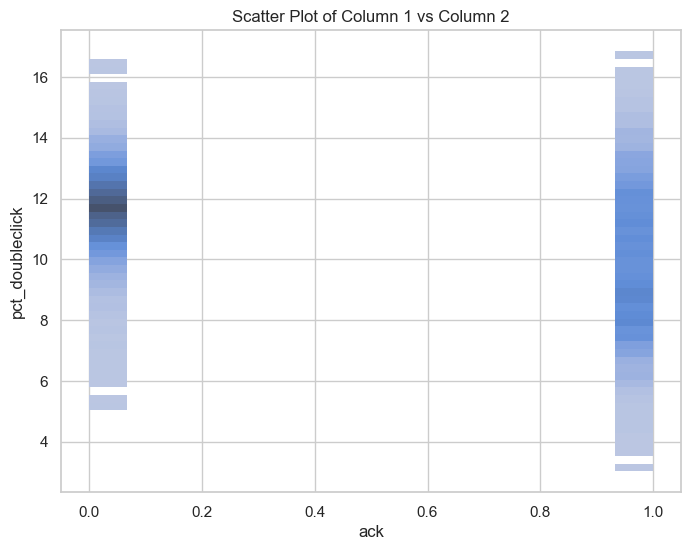

In [8]:

# new_frame = df_session["session_duration"]/df_session["pct_mouse_click"]
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(x='ack', y="pct_doubleclick", data=df_session)
plt.xlabel('ack')
plt.ylabel('pct_doubleclick')
plt.title('Scatter Plot of Column 1 vs Column 2')



Text(0.5, 1.0, 'Scatter Plot of Column 1 vs Column 2')

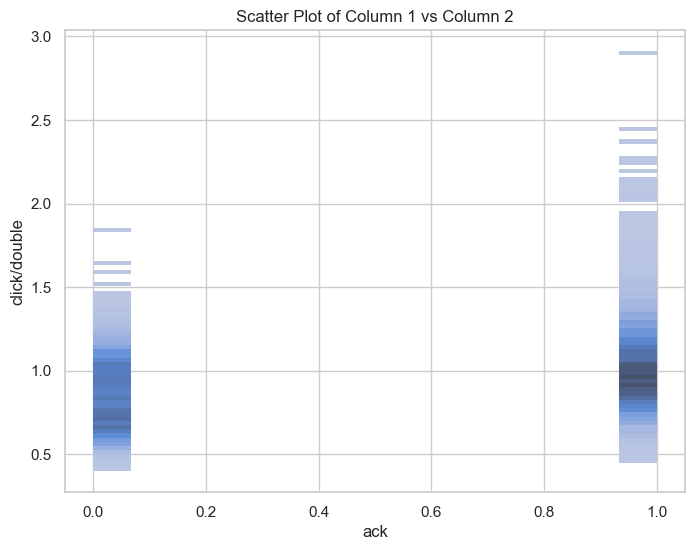

In [9]:
ratio_df = pd.DataFrame(df_session['pct_click']/df_session['pct_doubleclick'])
ratio_df["ack"] = df_session['ack']
ratio_df.columns = ["click/double","ack"]
ratio_df
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6)) 
sns.histplot(x='ack', y="click/double", data=ratio_df)
plt.xlabel('ack')
plt.ylabel('click/double')
plt.title('Scatter Plot of Column 1 vs Column 2')


0         5.333136
1        17.066876
2        19.294667
3        11.956967
4         9.038829
           ...    
11034    13.353347
11035     7.456677
11036    11.994935
11037    17.037489
11038    23.509143
Length: 11039, dtype: float64


count    11027.000000
mean        10.002395
std          2.162178
min          3.052910
25%          8.282010
50%          9.829440
75%         11.722350
max         16.883540
Name: mouse_move_total_rel_distance, dtype: float64

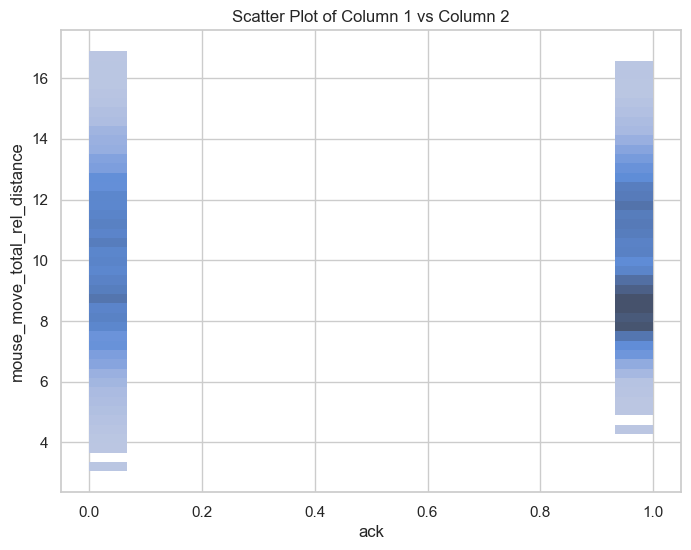

In [10]:
new_frame = df_session["session_duration"]/df_session["pct_mouse_click"]
print(new_frame)
sns.set(style='whitegrid')  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set_ the figure size
sns.histplot(x='ack', y="mouse_move_total_rel_distance", data=df_session)
plt.xlabel('ack')
plt.ylabel('mouse_move_total_rel_distance')
plt.title('Scatter Plot of Column 1 vs Column 2')
df_session["mouse_move_total_rel_distance"].describe()

                          pct_scroll_move_duration  pct_click
pct_scroll_move_duration                  1.000000   0.662606
pct_click                                 0.662606   1.000000


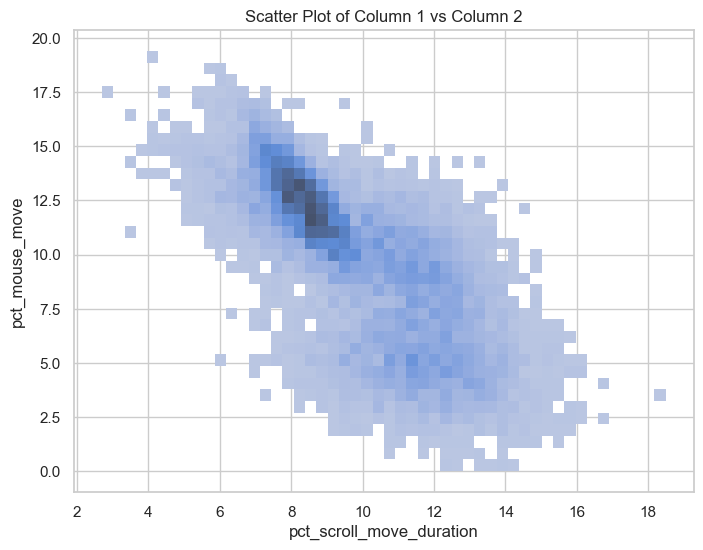

In [11]:
sampled = df_session.sample(n=10000, random_state=12)
print(sampled[["pct_scroll_move_duration","pct_click"]].corr())
def matej(x1, x2):
    sns.set(style='whitegrid')  # Optional: Set the style
    plt.figure(figsize=(8, 6))  # Optional: Set_ the figure size
    sns.histplot(x=f'{x1}', y=f'{x2}', data=sampled)
    plt.xlabel(f'{x1}')
    plt.ylabel(f'{x2}')
    plt.title('Scatter Plot of Column 1 vs Column 2')
y = sampled.columns[0]
matej('pct_scroll_move_duration', 'pct_mouse_move')
sampled[['pct_scroll_move_duration','pct_mouse_move']].corr()
sampled["wild_mouse_duration"] = sampled["wild_mouse_duration"].where(sampled["wild_mouse_duration"] < 300, 0)

Problémy v dátach: duplicitné user_id v tabuľke user.csv
Riešenine: odstránenie všetkých výskytov duplicitného user_id


In [13]:
df_nodupuser = df_users
idecka = {}

for id in df_users["user_id"]:
    if id in idecka.keys():
       idecka[id] += 1 
    else:
        idecka[id] = 1
to_remove = []
for row in df_users.iterrows():
    index = row[0]
    user_id = row[1]["user_id"]
    if idecka[user_id] > 1:
        to_remove.append(index)
print(to_remove)
df_nodupuser = df_nodupuser.drop(to_remove)
print(len(df_users), len(df_nodupuser))
df_nodupuser.reset_index()
        





[0, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 20, 21, 22, 25, 26, 28, 31, 32, 33, 37, 38, 39, 41, 43, 44, 45, 46, 47, 49, 50, 51, 53, 56, 57, 58, 59, 62, 64, 65, 66, 67, 68, 69, 71, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 92, 94, 97, 100, 101, 102, 107, 109, 111, 114, 115, 116, 117, 118, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 138, 139, 140, 141, 144, 145, 148, 149, 151, 152, 153, 154, 155, 156, 160, 162, 163, 164, 165, 166, 168, 169, 174, 175, 176, 177, 182, 184, 186, 187, 190, 191, 192, 194, 196, 198, 202, 205, 206, 207, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 240, 241, 242, 243, 244, 247, 248, 249, 250, 252, 253, 259, 260, 261, 262, 263, 265, 266, 267, 268, 271, 272, 273, 274, 276, 277, 278, 281, 282, 283, 284, 285, 286, 287, 288, 292, 293, 296, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 310, 311, 313, 315, 316, 318, 320, 321, 322, 323, 325, 326, 328, 329, 330, 332, 33

,index,race,username,sex,residence,user_id,name,address,mail,current_location,registration,birthdate
0,1,unspecified,pirescarolina,F,NaN,2066,Pietra Castro,"Campo de Araújo, 606\nMonte São José\n57558095...",gomesana@yahoo.com.br,"(Decimal('28.1621345'), Decimal('-173.517410'))",2021-08-09,NaN
1,2,NaN,maskovalucie,NaN,NaN,1023,Růžena Pospíšilová,Kremnická 66\n518 24 Žacléř,pavelfiala@post.cz,"(Decimal('-80.913702'), Decimal('21.046467'))",2020/08/06,1921-09-21
2,9,NaN,gda-cruz,NaN,NaN,2061,Emanuel da Conceição,NaN,gmonteiro@yahoo.com.br,"(Decimal('89.734118'), Decimal('-103.039006'))","11/07/2018, 00:00:00",2000-11-28
3,11,NaN,trommlerleonie,M,NaN,96,Leo Hiller-Holt,Täschering 491\n69752 Eberswalde,daniellesontag@gmx.de,"(Decimal('-81.5533295'), Decimal('-72.476163'))",12 Jan 2014,1937-11-17
4,12,NaN,igorcostela,NaN,NaN,1196,Beatriz Carvalho,"Loteamento Nathan Melo, 8\nSantana Do Cafezal\...",fogacaluiz-otavio@bol.com.br,"(Decimal('80.7165165'), Decimal('-17.568838'))",25 Nov 2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
944,2575,NaN,smithcarmen,M,"564 Andrea Freeway Suite 701\nWilliamsmouth, N...",1201,Keith Patton DDS,04212 Melvin Mountain Suite 359\nSouth Douglas...,elizabeth32@hotmail.com,"(Decimal('-70.997122'), Decimal('156.990661'))",2021-01-12,1975-01-27
945,2578,NaN,wbarber,M,NaN,1551,Eduardo Johnson,"408 Davis Junction Apt. 020\nMejiaside, PA 62823",hvilla@hotmail.com,"(Decimal('35.572745'), Decimal('13.032466'))","03/31/2018, 00:00:00",1951-11-07
946,2581,NaN,xwatanabe,F,NaN,2093,松本 香織,岩手県山武郡九十九里町虎ノ門虎ノ門ヒルズ森タワー4丁目24番12号 ハイツ港南664,yamamotorika@yahoo.com,"(Decimal('-12.9191985'), Decimal('-21.733244'))",14 Oct 2013,2019-02-17
947,2583,white,nogueiragabriel,NaN,NaN,2511,Arthur Cardoso,NaN,correiaalana@bol.com.br,"(Decimal('-39.812127'), Decimal('0.187696'))","07/05/2022, 00:00:00",1968-08-08


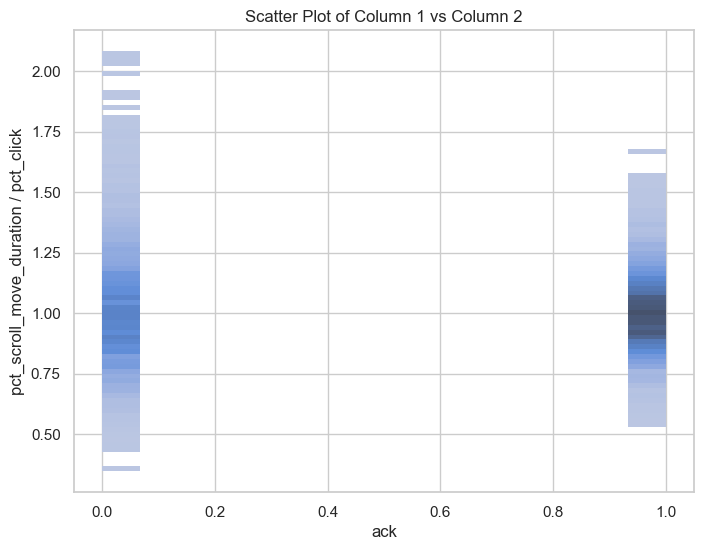

In [12]:
def matej2(x, y):
    pom_f = pd.DataFrame(sampled[f'{x}'] / sampled[f'{y}'])
    pom_f["ack"] = sampled["ack"]
    pom_f.columns = [f'{x} / {y}', "ack"]
    pom_f[f'{x} / {y}'] =  pom_f[f'{x} / {y}'].where(pom_f[f'{x} / {y}'] < 4)
    sns.set(style='whitegrid')  # Optional: Set the style
    plt.figure(figsize=(8, 6))  # Optional: Set_ the figure size
    sns.histplot(x='ack', y=f'{x} / {y}', data=pom_f)
    plt.xlabel('ack')
    plt.ylabel(f'{x} / {y}')
    plt.title('Scatter Plot of Column 1 vs Column 2')
matej2('pct_scroll_move_duration', 'pct_click')

In [14]:
df_merged = df_session.merge(df_nodupuser, how="inner")
df_merged


,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,race,username,sex,residence,name,address,mail,current_location,registration,birthdate
0,223045,47.96486,11.32534,11.29606,48.47653,firefox,48.95236,11.39144,2.30071,1280,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
1,623734,132.25714,11.88174,11.58618,25.58663,safari,51.07750,9.44179,1.84508,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
2,159057,143.60687,7.83379,2.92107,70.63719,opera,41.89119,10.05044,2.92902,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
3,551040,248.09308,4.95972,4.52411,48.16995,opera,54.76994,9.96582,8.07877,1366,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
4,6355,165.90198,11.27945,14.79490,49.78113,chrome,44.72991,8.48023,2.04936,800,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,817978,168.30985,13.22728,13.23870,59.44815,edge,43.64091,11.70369,1.05211,1280,...,asian,ccerna,M,Pyšelská 1\n369 25 Žamberk,Miloslav Dušek,NaN,krejcovabohumila@centrum.cz,"(Decimal('39.6622325'), Decimal('-62.817658'))","12/10/2021, 00:00:00",1964-12-12
4071,992036,172.54963,11.39298,14.91608,41.20110,edge,47.24597,9.50976,2.63677,higher,...,NaN,agnolosanguineti,NaN,NaN,Sig. Micheletto Dalla,"Contrada Roman, 975 Appartamento 5\n00127, Mez...",paloma99@gmail.com,"(Decimal('73.519198'), Decimal('-116.041196'))","03/16/2017, 00:00:00",1965-11-23
4072,856525,92.97564,9.92790,7.32274,59.13477,chrome,58.16094,10.43395,5.45315,800,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19
4073,472623,54.60196,10.88118,11.77482,44.68072,chrome,57.48251,7.80662,4.27341,1280,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19


Problém v dátach: nekonzistentná forma dátumu registrácie
Riešenie: upravenie datumov registracie na jednotny format rrrr-mm-dd

pôvodná forma dátumu registrácie mala 4 druhy:
- rrrr-mm-dd
- rrrr/mm/dd
- mm/dd/rrrr, 00:00:00
- dd Mes rrrr
Bol zvolený formát rok-mesiac-den a tabuľka bola upravená

In [15]:
# rrrr-mm-dd
# rrrr/mm/dd
# mm/dd/rrrr, 00:00:00
# dd Mes rrrr

def get_format(date):
    months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}
    if len(date.split("-")) == 3:
        splitted = date.split("-")
        rok = splitted[0]
        mesiac = splitted[1]
        den = splitted[2]
    elif len(date.split("/")) == 3:
        splitted = date.split("/")
        if len(splitted[2]) > 4:
            mesiac = splitted[0]
            den = splitted[1]
            rok = splitted[2][:4]
        else:
            rok = splitted[0]
            mesiac = splitted[1]
            den = splitted[2]
    elif len(date.split(" ")) == 3:
        splitted = date.split(" ")
        den = splitted[0]
        mesiac = months[splitted[1]]
        rok = splitted[2]
    return f"{rok}-{mesiac}-{den}"

for row in df_merged.iterrows():
    datum = get_format(row[1]["registration"])
    df_merged.at[row[0], "registration"] = datum

df_merged

,session_id,session_duration,pct_mouse_click,pct_mouse_move,pct_scrandom,browser_name,pct_scroll_move,wild_mouse_duration,total_load_time,screen_width,...,race,username,sex,residence,name,address,mail,current_location,registration,birthdate
0,223045,47.96486,11.32534,11.29606,48.47653,firefox,48.95236,11.39144,2.30071,1280,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
1,623734,132.25714,11.88174,11.58618,25.58663,safari,51.07750,9.44179,1.84508,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
2,159057,143.60687,7.83379,2.92107,70.63719,opera,41.89119,10.05044,2.92902,lower,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
3,551040,248.09308,4.95972,4.52411,48.16995,opera,54.76994,9.96582,8.07877,1366,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
4,6355,165.90198,11.27945,14.79490,49.78113,chrome,44.72991,8.48023,2.04936,800,...,black,gscalfaro,NaN,NaN,Gianni Sagese,"Piazza Silvio, 97 Appartamento 98\n67058, San ...",arturocostalonga@libero.it,"(Decimal('-72.364280'), Decimal('101.224035'))",2021-09-11,1938-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,817978,168.30985,13.22728,13.23870,59.44815,edge,43.64091,11.70369,1.05211,1280,...,asian,ccerna,M,Pyšelská 1\n369 25 Žamberk,Miloslav Dušek,NaN,krejcovabohumila@centrum.cz,"(Decimal('39.6622325'), Decimal('-62.817658'))",2021-12-10,1964-12-12
4071,992036,172.54963,11.39298,14.91608,41.20110,edge,47.24597,9.50976,2.63677,higher,...,NaN,agnolosanguineti,NaN,NaN,Sig. Micheletto Dalla,"Contrada Roman, 975 Appartamento 5\n00127, Mez...",paloma99@gmail.com,"(Decimal('73.519198'), Decimal('-116.041196'))",2017-03-16,1965-11-23
4072,856525,92.97564,9.92790,7.32274,59.13477,chrome,58.16094,10.43395,5.45315,800,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19
4073,472623,54.60196,10.88118,11.77482,44.68072,chrome,57.48251,7.80662,4.27341,1280,...,NaN,milena14,F,NaN,Bianca Fogaça,NaN,sarahcardoso@ig.com.br,"(Decimal('89.4235045'), Decimal('-41.293519'))",2018-06-20,2006-09-19


Hypotéza: ľudia v produktívnom veku kupujú častejšie
Výsledok hypotézy: Síce najviac nákupov robí veková skupina 40-49, nie je možné povedať, či to nie je spôsobené len tým, že pri registrácií nebol uvedený správny dátum narodenia. Vyplýva to aj z toho, že deti vo veku 0-9 rokov alebo seniori vo veku 110-119 rokov robia pomerne veľký počet nákupov.

C:\Users\Samo\AppData\Local\Temp\ipykernel_7280\177642429.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Purchases', data=df_to_plot, palette="Blues_d")


<Axes: xlabel='Age Group', ylabel='Purchases'>

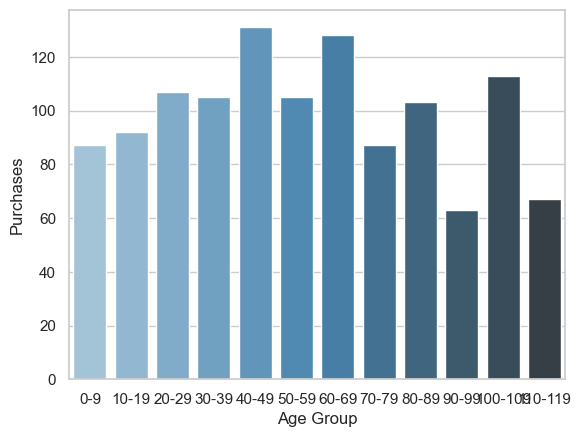

In [23]:
from datetime import datetime

nakupy = {}

for start in range(0, 120, 10):
    end = start + 9
    key = f"{start}-{end}"
    nakupy[key] = 0


def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, "%Y-%m-%d")
    current_date = datetime.now()
    age = current_date.year - birthdate.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

veky = []
for row in df_merged.iterrows():
    vek = None
    if str(row[1]["birthdate"]) != 'nan':
        vek  = int(calculate_age(row[1]["birthdate"]))
        veky.append(vek)
    else:
        veky.append(vek)
    if vek and row[1]["ack"] == 1:
        for key in nakupy:
            start, end = map(int, key.split('-'))
            if start <= vek <= end:
                nakupy[key] += 1
df_merged["age"] = veky
to_plot = {"Age Group" : nakupy.keys(), "Purchases": nakupy.values()}
df_to_plot = pd.DataFrame(to_plot).set_index('Age Group')
sns.set(style="whitegrid")
sns.barplot(x='Age Group', y='Purchases', data=df_to_plot, palette="Blues_d")



Hypoteza 1:
H_0: mean populacie pomeru sa rovna 1
H_A: mean populacie sa nerovna 1

k normalizovanym datam je priratana priemerna hodnota(mu) aby sa zachovala priemerna hodnota originalnych dat

In [17]:
df_hyp1 = pd.DataFrame(df_session["pct_scroll_move_duration"] / df_session["pct_click"])
df_hyp1["ack"] = df_session["ack"]
df_hyp1 = df_hyp1.where(df_hyp1["ack"] == 1).dropna()
df_hyp1.reset_index().drop("index", axis="columns")
df_hyp1.columns = ["scroll/click", "ack"]

mu = df_hyp1.mean()
print(mu)
norm = (df_hyp1["scroll/click"] - mu[0]) / numpy.std(df_hyp1["scroll/click"])

print(stats.shapiro(norm))


scroll/click    1.009112
ack             1.000000
dtype: float64
ShapiroResult(statistic=0.9933575987815857, pvalue=3.930785299560241e-16)


C:\Users\Samo\AppData\Local\Temp\ipykernel_7280\2246121517.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm = (df_hyp1["scroll/click"] - mu[0]) / numpy.std(df_hyp1["scroll/click"])
C:\Users\Samo\PycharmProjects\IAUsMatom\venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


aj ked nevysiel shapiro test normality tak pokracujeme v testovani hypotezy kedze striktnost shapiro testu je dost vysoka podla vizualizacie je vidno naznaky normalnej distribucie

C:\Users\Samo\AppData\Local\Temp\ipykernel_7280\3086211887.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.histplot(norm + mu[0], label="normalized data")
C:\Users\Samo\AppData\Local\Temp\ipykernel_7280\3086211887.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats.ttest_1samp(norm + mu[0], popmean=1, alternative="two-sided")


TtestResult(statistic=0.7062147743208201, pvalue=0.4800819726029538, df=6007)

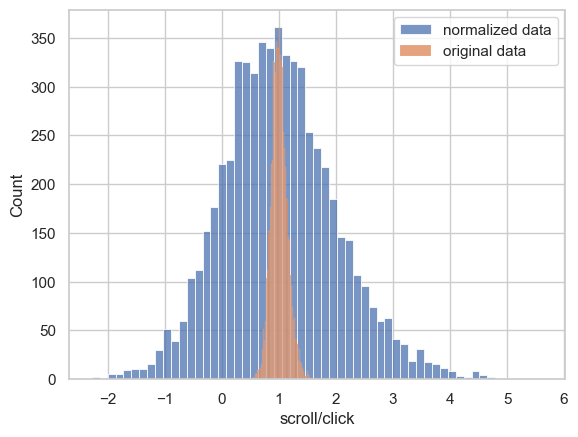

In [18]:
sns.histplot(norm + mu[0], label="normalized data")
sns.histplot(df_hyp1["scroll/click"], label="original data")

plt.legend()
stats.ttest_1samp(norm + mu[0], popmean=1, alternative="two-sided")

Z vysledku t-testu pre normalizovanu distribuciu pomeru nam vyplyva ze nezamietame H_0 pretoze p value spada do akceptovaneho rozsahu. Z tohoto vyplyva ze je statisticky najpravdepodobnejsie ze zakaznik nakupi ak na jednu sekundu scrollovania 1x klikne